In [1]:
import ezdxf
import numpy as np
import sys


# Drawing

In [1]:
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend
import matplotlib.pyplot as plt


In [2]:
def dibujar_dxf(msp):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(doc)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(msp, finalize=True)


In [3]:
def save_png(msp, filename="test.png", has_draw=False):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(doc)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(msp, finalize=True)
    fig.savefig(filename, dpi=300)
    if has_draw is False:
        plt.close()


findfont: Font family ['Txt'] not found. Falling back to DejaVu Sans.


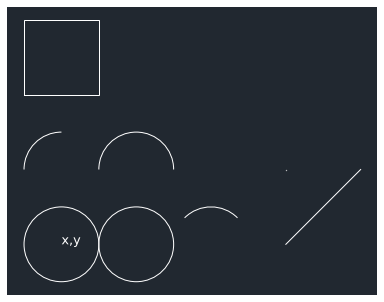

In [4]:
# Safe loading procedure (requires ezdxf v0.14):
try:
    doc, auditor = recover.readfile('dibujar_cosas.dxf')
except IOError:
    print(f'Not a DXF file or a generic I/O error.')
    sys.exit(1)
except ezdxf.DXFStructureError:
    print(f'Invalid or corrupted DXF file.')
    sys.exit(2)


if not auditor.has_errors:
    dibujar_dxf(doc.modelspace())

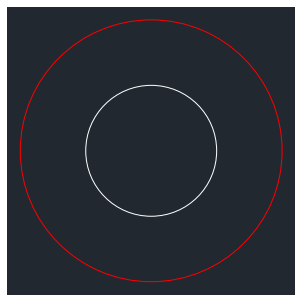

In [9]:
doc = ezdxf.new("R2000")
msp = doc.modelspace()

# important: major axis >= minor axis (ratio <= 1.)
# minor axis length = major axis length * ratio

# mark the base point with a circle
msp.add_circle((0, 0), radius=20, dxfattribs={'color': 1})
# mark the base point with a circle
msp.add_circle((0, 0), radius=10, dxfattribs={'color': 7})
dibujar_dxf(msp)


# Dibujar algunas cosas

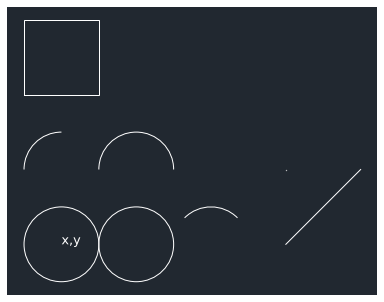

In [10]:
doc = ezdxf.new("R2000")
msp = doc.modelspace()

# important: major axis >= minor axis (ratio <= 1.)
# minor axis length = major axis length * ratio

msp.add_circle((0,0), radius=10, dxfattribs={'color': 7})  # mark the base point with a circle


msp.add_ellipse((20, 0), major_axis=(10,0), ratio=1)

msp.add_ellipse((20, 20), major_axis=(10,0), ratio=1, start_param=0, end_param=np.pi)

msp.add_ellipse((0, 20), major_axis=(10,0), ratio=1, start_param=np.pi/2, end_param=np.pi)

msp.add_arc(center=(40,0), radius=10, start_angle=45, end_angle=135) # no tengo claro los ángulos

msp.add_line(start=(60,0), end = (80,20))

msp.add_point(location=(60,20))

msp.add_text("x,y", )

msp.add_polyline2d( points=[(-10,40), (10,40), (10,60), (-10,60)], close=True)
 
doc.saveas("dibujar_cosas.dxf")

dibujar_dxf(msp)



[[-10  40]
 [ 10  40]
 [ 10  60]
 [-10  60]
 [-10  40]]


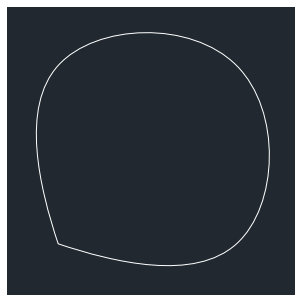

In [115]:
doc = ezdxf.new("R2000")
msp = doc.modelspace()

# important: major axis >= minor axis (ratio <= 1.)
# minor axis length = major axis length * ratio

points = np.array([(-10,40), (10,40), (10,60), (-10,60), (-10,40)])
print(points)

msp.add_spline(fit_points = points, degree=2)

 
doc.saveas("dibujar_spline_0.dxf")

dibujar_dxf(msp)



[[ 1.00000000e+02  0.00000000e+00]
 [ 1.00784061e+02  6.33887171e-01]
 [ 1.01563297e+02  1.27762697e+00]
 ...
 [ 9.84208807e+01 -1.23809660e+00]
 [ 9.92119829e+01 -6.23999493e-01]
 [ 1.00000000e+02 -2.44929360e-14]]


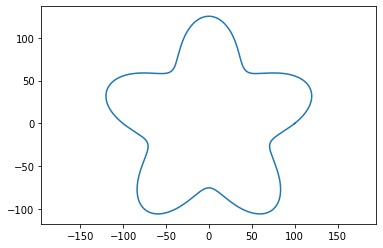

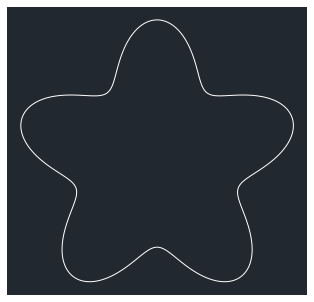

In [14]:
doc = ezdxf.new("R2000")
msp = doc.modelspace()

# important: major axis >= minor axis (ratio <= 1.)
# minor axis length = major axis length * ratio

angle = np.linspace(0,2*np.pi,1000)
radius = 100+25*np.sin(angle*5)

x = radius * np.cos(angle)
y = radius * np.sin(angle)

plt.figure()
plt.plot(x,y)
plt.axis('equal')


points=np.vstack((x,y)).transpose()
print(points)


msp.add_spline(fit_points = points, degree=2)

 
doc.saveas("dibujar_spline_1.dxf")

dibujar_dxf(msp)

# Guardar

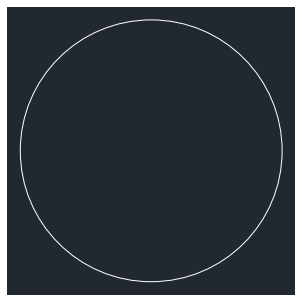

In [60]:
doc = ezdxf.new("R2000")
msp = doc.modelspace()

# important: major axis >= minor axis (ratio <= 1.)
# minor axis length = major axis length * ratio

msp.add_circle((0,0), radius=10, dxfattribs={'color': 7})  # mark the base point with a circle


doc.saveas("test_circle.dxf")
save_png(msp, "test_circle.png")


# Relleno: Hatch

## Elipse hatch

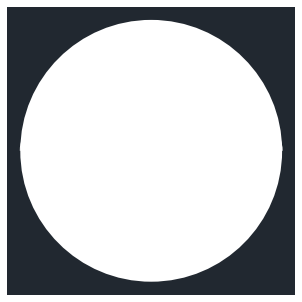

In [19]:
# hatch requires the DXF R2000 or later
doc = ezdxf.new("R2000")
msp = doc.modelspace()

# important: major axis >= minor axis (ratio <= 1.)
# minor axis length = major axis length * ratio
msp.add_ellipse((0, 0), major_axis=(10,0), ratio=0.5, start_param=0, end_param=np.pi)

# by default a solid fill hatch with fill color=7 (white/black)
hatch = msp.add_hatch(color=7)

# every boundary path is a 2D element
edge_path = hatch.paths.add_edge_path()
# each edge path can contain line, arc, ellipse and spline elements
# important: major axis >= minor axis (ratio <= 1.)
# edge_path.add_ellipse((0, 0), major_axis=(0, 10), ratio=0.5)
edge_path.add_ellipse((0, 0), major_axis=(10,0), ratio=1)

doc.saveas("test_hatch_ellipse.dxf")
dibujar_dxf(msp)


## Hatch polyline

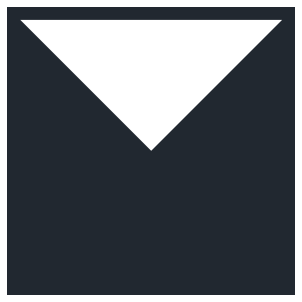

In [21]:
doc = ezdxf.new("R2000")
msp = doc.modelspace()

points0 = [(-10, 10), (10, 10), (0, 0), (10, -10), (-10, 10)]

#msp.add_polyline2d( points=points0, close=True)

hatch = msp.add_hatch(color=7)

# every boundary path is a 2D element
# edge_path = hatch.paths.add_edge_path()
# each edge path can contain line, arc, ellipse and spline elements
# important: major axis >= minor axis (ratio <= 1.)
# edge_path.add_ellipse((0, 0), major_axis=(0, 10), ratio=0.5)
hatch.paths.add_polyline_path(points0)


dibujar_dxf(msp)

# Hatch entre dos sitios

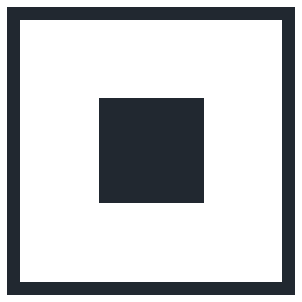

In [25]:

# hatch requires the DXF R2000 or later
doc = ezdxf.new("R2000")
msp = doc.modelspace()

# by default a solid fill hatch with fill color=7 (white/black)
hatch = msp.add_hatch(
    color=7,
    dxfattribs={
        "hatch_style": ezdxf.const.HATCH_STYLE_NESTED,
        # 0 = nested: ezdxf.const.HATCH_STYLE_NESTED
        # 1 = outer: ezdxf.const.HATCH_STYLE_OUTERMOST
        # 2 = ignore: ezdxf.const.HATCH_STYLE_IGNORE
    },
)

# The first path has to set flag: 1 = external
# flag const.BOUNDARY_PATH_POLYLINE is added (OR) automatically
hatch.paths.add_polyline_path(
    [(0, 0), (10, 0), (10, 10), (0, 10)],
    is_closed=True,
    flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL,
    # The second path has to set flag: 16 = outermost
)

hatch.paths.add_polyline_path(
    [(3, 3), (7, 3), (7, 7), (3, 7)],
    is_closed=True,
    flags=ezdxf.const.BOUNDARY_PATH_OUTERMOST,
)

doc.saveas("hatch_polyline.dxf")
dibujar_dxf(msp)

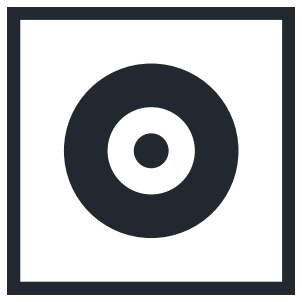

In [30]:
# hatch requires the DXF R2000 or later
doc = ezdxf.new("R2000")
msp = doc.modelspace()

# by default a solid fill hatch with fill color=7 (white/black)
hatch = msp.add_hatch(
    color=7,
    dxfattribs={
        "hatch_style": ezdxf.const.HATCH_STYLE_NESTED,
        # 0 = nested: ezdxf.const.HATCH_STYLE_NESTED
        # 1 = outer: ezdxf.const.HATCH_STYLE_OUTERMOST
        # 2 = ignore: ezdxf.const.HATCH_STYLE_IGNORE
    },
)

# The first path has to set flag: 1 = external
# flag const.BOUNDARY_PATH_POLYLINE is added (OR) automatically
hatch.paths.add_polyline_path(
    [(-15, -15), (15, -15), (15, 15), (-15, 15)],
    is_closed=True,
    flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL,
    # The second path has to set flag: 16 = outermost
)

edge_path = hatch.paths.add_edge_path()
# , flags=ezdxf.const.BOUNDARY_PATH_OUTERMOST)
edge_path.add_ellipse((0, 0), major_axis=(10, 0), ratio=1)
edge_path.add_ellipse((0, 0), major_axis=(5, 0), ratio=1)

edge_path.add_ellipse((0, 0), major_axis=(2, 0), ratio=1)

doc.saveas("hatch_polyline.dxf")
dibujar_dxf(msp)


## Anillo

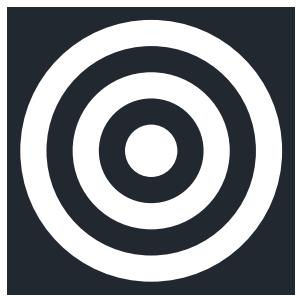

In [129]:

# hatch requires the DXF R2000 or later
doc = ezdxf.new("R2000")
msp = doc.modelspace()

# by default a solid fill hatch with fill color=7 (white/black)
hatch = msp.add_hatch(
    color=7,
    dxfattribs={
        "hatch_style": ezdxf.const.HATCH_STYLE_NESTED,
        # 0 = nested: ezdxf.const.HATCH_STYLE_NESTED
        # 1 = outer: ezdxf.const.HATCH_STYLE_OUTERMOST
        # 2 = ignore: ezdxf.const.HATCH_STYLE_IGNORE
    },
)

# The first path has to set flag: 1 = external
# flag const.BOUNDARY_PATH_POLYLINE is added (OR) automatically
edge_path = hatch.paths.add_edge_path()

edge_path.add_ellipse((0, 0), major_axis=(50,0), ratio=1) # , flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL)
edge_path.add_ellipse((0, 0), major_axis=(40,0), ratio=1) # , flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL)
edge_path.add_ellipse((0, 0), major_axis=(30,0), ratio=1) # , flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL)
edge_path.add_ellipse((0, 0), major_axis=(20,0), ratio=1) # , flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL)
edge_path.add_ellipse((0, 0), major_axis=(10,0), ratio=1) #, flags=ezdxf.const.BOUNDARY_PATH_OUTERMOST)


doc.saveas("hatch_ring1.dxf")
dibujar_dxf(msp)
save_png(msp, "hatch_ring1.png")


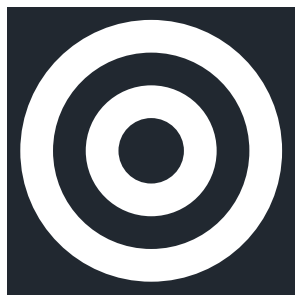

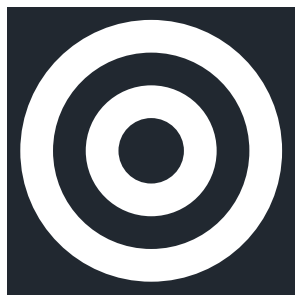

In [79]:

# hatch requires the DXF R2000 or later
doc = ezdxf.new("R2000")
msp = doc.modelspace()

# by default a solid fill hatch with fill color=7 (white/black)
hatch = msp.add_hatch(
    color=7,
    dxfattribs={
        "hatch_style": ezdxf.const.HATCH_STYLE_NESTED,
        # 0 = nested: ezdxf.const.HATCH_STYLE_NESTED
        # 1 = outer: ezdxf.const.HATCH_STYLE_OUTERMOST
        # 2 = ignore: ezdxf.const.HATCH_STYLE_IGNORE
    },
)

# The first path has to set flag: 1 = external
# flag const.BOUNDARY_PATH_POLYLINE is added (OR) automatically
edge_path = hatch.paths.add_edge_path()

edge_path.add_ellipse((0, 0), major_axis=(40,0), ratio=1) # , flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL)
edge_path.add_ellipse((0, 0), major_axis=(30,0), ratio=1) # , flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL)
edge_path.add_ellipse((0, 0), major_axis=(20,0), ratio=1) # , flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL)
edge_path.add_ellipse((0, 0), major_axis=(10,0), ratio=1) #, flags=ezdxf.const.BOUNDARY_PATH_OUTERMOST)


doc.saveas("hatch_ring2.dxf")
dibujar_dxf(msp)
save_png(msp, "hatch_ring2.png")


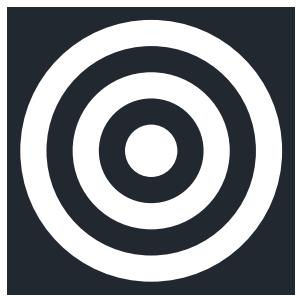

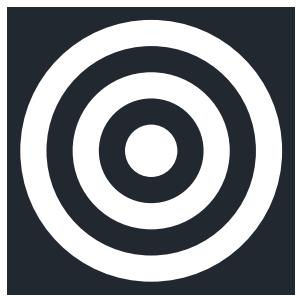

In [81]:

# hatch requires the DXF R2000 or later
doc = ezdxf.new("R2000")
msp = doc.modelspace()

# by default a solid fill hatch with fill color=7 (white/black)
hatch = msp.add_hatch(
    color=7,
    dxfattribs={
        "hatch_style": ezdxf.const.HATCH_STYLE_NESTED,
        # 0 = nested: ezdxf.const.HATCH_STYLE_NESTED
        # 1 = outer: ezdxf.const.HATCH_STYLE_OUTERMOST
        # 2 = ignore: ezdxf.const.HATCH_STYLE_IGNORE
    },
)

# The first path has to set flag: 1 = external
# flag const.BOUNDARY_PATH_POLYLINE is added (OR) automatically
edge_path = hatch.paths.add_edge_path()

edge_path.add_ellipse((0, 0), major_axis=(10,0), ratio=1) #, flags=ezdxf.const.BOUNDARY_PATH_OUTERMOST)
edge_path.add_ellipse((0, 0), major_axis=(20,0), ratio=1) # , flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL)
edge_path.add_ellipse((0, 0), major_axis=(30,0), ratio=1) # , flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL)
edge_path.add_ellipse((0, 0), major_axis=(40,0), ratio=1) # , flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL)
edge_path.add_ellipse((0, 0), major_axis=(50,0), ratio=1) # , flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL)


doc.saveas("hatch_ring2.dxf")
dibujar_dxf(msp)
save_png(msp, "hatch_ring2.png")


# complex polyline hatch

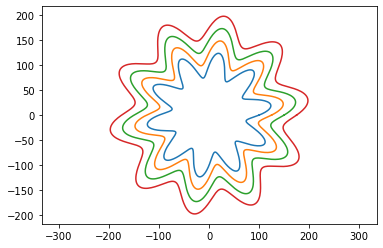

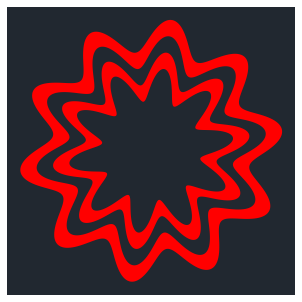

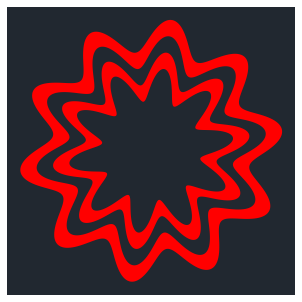

In [127]:

doc = ezdxf.new("R2000")
msp = doc.modelspace()

# important: major axis >= minor axis (ratio <= 1.)
# minor axis length = major axis length * ratio

angle = np.linspace(0,2*np.pi,500)
num_petals=10
radius1 = 100+25*np.sin(angle*num_petals)
radius2 = 125+25*np.sin(angle*num_petals)
radius3 = 150+25*np.sin(angle*num_petals)
radius4 = 175+25*np.sin(angle*num_petals)

x1 = radius1 * np.cos(angle)
y1 = radius1 * np.sin(angle)

x2 = radius2 * np.cos(angle)
y2 = radius2 * np.sin(angle)

x3 = radius3 * np.cos(angle)
y3 = radius3 * np.sin(angle)

x4 = radius4 * np.cos(angle)
y4 = radius4 * np.sin(angle)


plt.figure()
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.axis('equal')


points1=np.vstack((x1,y1)).transpose()
points2=np.vstack((x2,y2)).transpose()
points3=np.vstack((x3,y3)).transpose()
points4=np.vstack((x4,y4)).transpose()

# msp.add_spline(fit_points = points1, degree=2)
# msp.add_spline(fit_points = points2, degree=2)
# msp.add_spline(fit_points = points3, degree=2)
# msp.add_spline(fit_points = points4, degree=2)


# by default a solid fill hatch with fill color=7 (white/black)
hatch = msp.add_hatch(
    color=1,
    dxfattribs={
        "hatch_style": ezdxf.const.HATCH_STYLE_NESTED,
        # 0 = nested: ezdxf.const.HATCH_STYLE_NESTED
        # 1 = outer: ezdxf.const.HATCH_STYLE_OUTERMOST
        # 2 = ignore: ezdxf.const.HATCH_STYLE_IGNORE
    },
)

# The first path has to set flag: 1 = external
# flag const.BOUNDARY_PATH_POLYLINE is added (OR) automatically

hatch.paths.add_polyline_path(points1,
    is_closed=True,
    flags=ezdxf.const.BOUNDARY_PATH_OUTERMOST,
)
hatch.paths.add_polyline_path(points2,
    is_closed=True,
    flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL,
    # The second path has to set flag: 16 = outermost
)

hatch.paths.add_polyline_path(points3,
    is_closed=True,
    flags=ezdxf.const.BOUNDARY_PATH_OUTERMOST,
)
hatch.paths.add_polyline_path(points4,
    is_closed=True,
    flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL,
    # The second path has to set flag: 16 = outermost
)



 
doc.saveas("dibujar_spline_2.dxf")

dibujar_dxf(msp)
save_png(msp, "dibujar_spline_2.png")



## Circle hatch

In [ ]:
msp.add_circle(xy, radius=R[i], dxfattribs={'color': 7})  # mark the base point with a circle


In [10]:
# hatch requires the DXF R2000 or later
doc = ezdxf.new("R2000")
msp = doc.modelspace()

# important: major axis >= minor axis (ratio <= 1.)
# minor axis length = major axis length * ratio
msp.add_circle((0,0), radius=100, dxfattribs={'color': 7})  # mark the base point with a circle


<class 'ezdxf.entities.circle.Circle'> CIRCLE(#2F)

In [14]:

# by default a solid fill hatch with fill color=7 (white/black)
hatch = msp.add_hatch(color=7)


In [15]:

# every boundary path is a 2D element
edge_path = hatch.paths.add_edge_path()


In [ ]:
edge_path.add_ellipse((0, 0), major_axis=(0, 10), ratio=0.5)


In [16]:
# each edge path can contain line, arc, ellipse and spline elements
# important: major axis >= minor axis (ratio <= 1.)
edge_path.add_circle((0,0), radius=100)


AttributeError: 'EdgePath' object has no attribute 'add_circle'

In [13]:

doc.saveas("hatch_circle.dxf")


In [7]:
import ezdxf
doc = ezdxf.new()

# Create a block with the name 'FLAG'
flag = doc.blocks.new(name='FLAG')
msp = doc.modelspace()

xmin=1000
ymin=1000
xmax=-1000
ymax=-1000

hatch = msp.add_hatch(
    color=1,
    dxfattribs={
        "hatch_style": ezdxf.const.HATCH_STYLE_NESTED,
        # 0 = nested: ezdxf.const.HATCH_STYLE_NESTED
        # 1 = outer: ezdxf.const.HATCH_STYLE_OUTERMOST
        # 2 = ignore: ezdxf.const.HATCH_STYLE_IGNORE
    },
)


for i, xy in enumerate(XY):
    msp.add_circle(xy, radius=R[i], dxfattribs={'color': 7})  # mark the base point with a circle
    if xy[0]-radius < xmin:
        xmin = xy[0]-radius
    if xy[1]-radius < ymin:
        ymin = xy[1]-radius

    if xy[0]+radius > xmax:
        xmax = xy[0]+radius
    if xy[1]+radius > xmax:
        ymax = xy[1]+radius
        
size=max(np.abs((xmin,xmax,ymin,ymax)))
# Add DXF entities to the block 'FLAG'.
# The default base point (= insertion point) of the block is (0, 0).


hatch = msp.add_hatch(
    color=1,
    dxfattribs={
        "hatch_style": ezdxf.const.HATCH_STYLE_NESTED,
        # 0 = nested: ezdxf.const.HATCH_STYLE_NESTED
        # 1 = outer: ezdxf.const.HATCH_STYLE_OUTERMOST
        # 2 = ignore: ezdxf.const.HATCH_STYLE_IGNORE
    },
)

square = [(-size,-size), (-size,size), (size,size), (size,-size), (-size,-size)]

hatch.paths.add_polyline_path(
    square,
    is_closed=True,
    flags=ezdxf.const.BOUNDARY_PATH_EXTERNAL,
    # The second path has to set flag: 16 = outermost
)

msp.add_lwpolyline(square, dxfattribs={'color': 7})  # the flag symbol as 2D polyline
doc.saveas("new_name.dxf")


NameError: name 'XY' is not defined

## No se muy bien

https://github.com/mozman/ezdxf/discussions/461

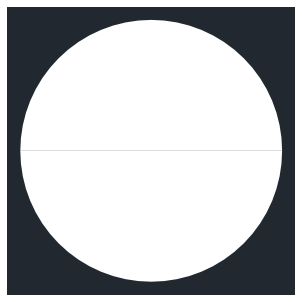

In [50]:
import ezdxf


doc = ezdxf.new()
msp = doc.modelspace()

# create a filled circle with radius 1.0 by a LWPOLYLINE:
# format "xyb" stands for x, y, bulge
polyline = msp.add_lwpolyline(
    [(0.5, 0, 1.0), (-0.5, 0, 1.0)], format="xyb", close=True
)
polyline.dxf.const_width = 1.0


dibujar_dxf(msp)


## No se muy bien

In [64]:
from ezdxf import recover
from ezdxf.entities import Insert, Hatch


def process_hatch(entity: Hatch):
    print('hatch: ', entity)

def process_insert(entity: Insert):
    for e in entity.virtual_entities():
        entity_type = e.dxftype()
        if entity_type == 'INSERT':
            process_insert(e)
        elif entity_type == 'HATCH':
            process_hatch(e)
        else:
            print('this is', e.dxftype())

dxf_doc, dxf_auditor= recover.readfile('test_circle.dxf')

for e in dxf_doc.modelspace():
    if e.dxf.invisible == 0:
        entity_type = e.dxftype()
        if entity_type == 'HATCH':
            process_hatch(e)
        elif entity_type == 'INSERT':
            process_insert(e)

doc.saveas("filled_circle.dxf")
